In [2]:
from imports import *
import staircase as sc
%matplotlib inline
import operator
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"../data/hotel_stays.csv", parse_dates=['check_in', 'check_out'], dayfirst=True)

#df = df_cc.loc[df_cc.call_type == 'Type 1']

df.shape

(13602, 6)

In [4]:
hotel_stays = Steps.read_dataframe(df,'check_in', 'check_out')
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

In [14]:
%%timeit -r 3 -n 3
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

67.1 ms ± 1.8 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [15]:
%%timeit -r 3 -n 3
hotel_stays = Steps.read_dataframe(df,'check_in', 'check_out')

78.8 ms ± 4.79 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


In [6]:
%prun Steps.read_dataframe(df,'check_in', 'check_out')

         326679 function calls (326675 primitive calls) in 0.138 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    27205    0.028    0.000    0.106    0.000 Steps.py:105(_process_data)
    27204    0.027    0.000    0.046    0.000 helpers.py:78(date_to_float)
     10/8    0.022    0.002    0.022    0.003 {built-in method numpy.array}
    40808    0.015    0.000    0.023    0.000 missing.py:130(_isna)
    27207    0.011    0.000    0.016    0.000 helpers.py:72(is_date_time)
    40808    0.010    0.000    0.033    0.000 missing.py:47(isna)
        1    0.006    0.006    0.138    0.138 Steps.py:159(add_direct)
    54417    0.004    0.000    0.004    0.000 {built-in method builtins.isinstance}
    40808    0.004    0.000    0.004    0.000 {built-in method pandas._libs.missing.checknull}
    40808    0.003    0.000    0.003    0.000 {pandas._libs.lib.is_scalar}
    27208    0.003    0.000    0.003    0.000 {built-in method bui

In [7]:
%prun queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

         341153 function calls (341147 primitive calls) in 0.166 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    24886    0.028    0.000    0.066    0.000 sortedlist.py:253(add)
        1    0.023    0.023    0.157    0.157 stairs.py:876(_layer_multiple)
    27205    0.023    0.000    0.089    0.000 sorteddict.py:276(__setitem__)
    24451    0.017    0.000    0.017    0.000 {built-in method _bisect.insort_right}
    24885    0.012    0.000    0.014    0.000 sortedlist.py:289(_expand)
    27204    0.012    0.000    0.018    0.000 missing.py:130(_isna)
    27204    0.011    0.000    0.101    0.000 stairs.py:552(__setitem__)
    27204    0.008    0.000    0.026    0.000 missing.py:47(isna)
    27206    0.007    0.000    0.007    0.000 {method 'get' of 'dict' objects}
    24885    0.005    0.000    0.005    0.000 {built-in method _bisect.bisect_right}
49794/49790    0.004    0.000    0.004    0.000 {built-in method builtin

In [8]:
%%timeit -r 3 -n 3
queue = sc.Stairs(use_dates=True).layer(df.check_in, df.check_out)

69 ms ± 4.26 ms per loop (mean ± std. dev. of 3 runs, 3 loops each)


<AxesSubplot:>

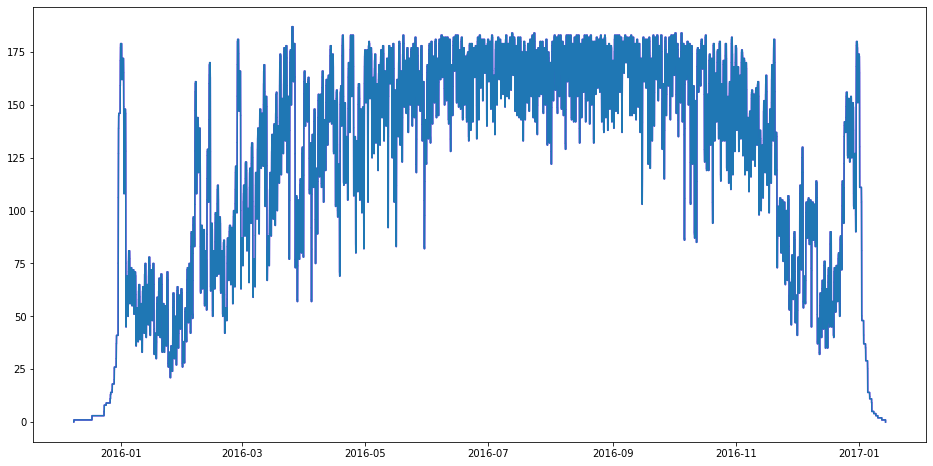

In [9]:
ax = hotel_stays.plot()
queue.plot(ax=ax)